In [192]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface
from modules import surface_amplitudes as sf
from modules import globals
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
indices = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
folders = utility.list_all_folders(globals.data_path,"amplitude-test")

../data/output-measure-surface/amplitude-test/beta-10.85-twist-1-44-44-64-6 , index: 0
../data/output-measure-surface/amplitude-test/beta-10.85-twist-2-44-44-64-6 , index: 1
../data/output-measure-surface/amplitude-test/beta-12.977777777777778-twist-1-44-44-64-6 , index: 2
../data/output-measure-surface/amplitude-test/beta-12.977777777777778-twist-2-44-44-64-6 , index: 3
../data/output-measure-surface/amplitude-test/beta-15.105555555555554-twist-1-44-44-64-6 , index: 4
../data/output-measure-surface/amplitude-test/beta-15.105555555555554-twist-2-44-44-64-6 , index: 5
../data/output-measure-surface/amplitude-test/beta-17.233333333333334-twist-1-44-44-64-6 , index: 6
../data/output-measure-surface/amplitude-test/beta-17.233333333333334-twist-2-44-44-64-6 , index: 7
../data/output-measure-surface/amplitude-test/beta-19.36111111111111-twist-1-44-44-64-6 , index: 8
../data/output-measure-surface/amplitude-test/beta-19.36111111111111-twist-2-44-44-64-6 , index: 9
../data/output-measure-surfa

In [213]:

smearing_levels=[0,2,5,10,20,30]
per_smearing = []
for smearing_level in smearing_levels:
    smooth_surfaces = {}
    for folder in folders:
        print(smearing_level)
        beta_value = float(folder.split("beta-")[1].split("-")[0])
        file = glob.glob(os.path.join(folder, f"surface_smooth_{smearing_level}"))[0]
        file_name = file.split("/")[-1]
        smearing_level = file_name.split("_")[-1]
        volume, smooth_surface = read_and_write.read_surface_data(folder, file_name=file_name)
        smooth_surfaces[beta_value] = smooth_surface
    per_smearing.append(smooth_surfaces)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


In [8]:
smooth_surfaces

{10.85: array([[[  0.     ,   0.     ,  27.0418 ],
         [  1.     ,   0.     ,  75.1606 ],
         [  2.     ,   0.     ,  38.9587 ],
         ...,
         [ 41.     ,  43.     ,  51.035  ],
         [ 42.     ,  43.     ,  86.9631 ],
         [ 43.     ,  43.     ,  87.9927 ]],
 
        [[  0.     ,   0.     ,  -9.46513],
         [  1.     ,   0.     ,  19.0449 ],
         [  2.     ,   0.     , -15.7179 ],
         ...,
         [ 41.     ,  43.     ,  24.0186 ],
         [ 42.     ,  43.     , -14.9514 ],
         [ 43.     ,  43.     , -29.1176 ]],
 
        [[  0.     ,   0.     ,  39.2023 ],
         [  1.     ,   0.     ,  69.0207 ],
         [  2.     ,   0.     ,  40.8015 ],
         ...,
         [ 41.     ,  43.     ,  87.2081 ],
         [ 42.     ,  43.     ,  76.9192 ],
         [ 43.     ,  43.     ,  30.608  ]],
 
        ...,
 
        [[  0.     ,   0.     ,   7.04091],
         [  1.     ,   0.     ,  -5.79975],
         [  2.     ,   0.     ,  14.9587 ],
   

[27.0418 75.1606 38.9587 ... 51.035  86.9631 87.9927]
[63.9623188, 63.9590044, 63.9544483, 63.9230021, 63.77860149999999, 63.097369900000004, 61.051592600000006, 55.1761581, 43.757582899999996, 33.84786264]
[38.8627 37.572  41.9494 ... 60.9568 89.0591 53.0344]
[63.9364129, 26.985760594, 8.89981387, 8.254822599999999, 7.6864229811169995, 7.51461230939, 7.5600505909999995, 7.2877107699999994, 7.343846399999999, 7.243644347698]
[66.4087 38.8225 38.0086 ... 53.6289 53.715  53.9674]
[63.553597200000006, 7.23116923234, 6.11219837, 5.7780949999999995, 5.468827597863, 5.387643104347, 5.42907209049, 5.226411573699999, 5.266775900000001, 5.2004217541]
[66.5141 67.2192 39.5782 ... 54.0157 54.1211 54.4993]
[51.9917105312, 5.5926481415, 4.78248158, 4.4753819, 4.23529740922, 4.163775796359, 4.194002748591, 4.019129689650001, 4.0443813, 3.9792667586399997]
[65.3536 65.8715 65.9686 ... 55.5314 55.4182 55.305 ]
[15.201964166859998, 4.408135190972, 3.7647224269999997, 3.4547666, 3.23176658425, 3.1766853

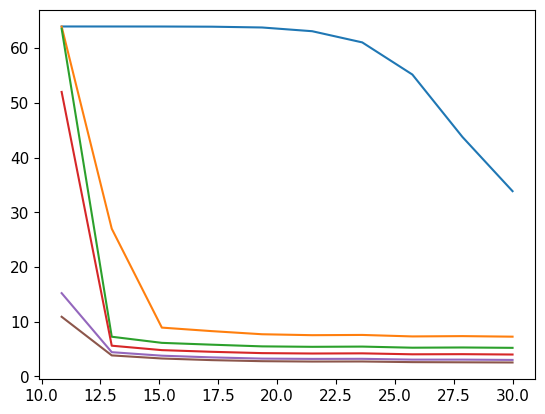

In [214]:
for smear,smooth_surfaces in zip(smearing_levels,per_smearing):
    print(smooth_surfaces[10.85][:,:,2][0])
    thermalize = 1000
    amplitudes = []
    for key, surface in smooth_surfaces.items():    
        surface = surface[thermalize:,:,:]
        # print(list(smooth_surfaces.keys())[0])
        # #print(surface[:,:,:])
        # #print((surface[0,:,2] - surface[0,:,2].mean()).max()-(surface[0,:,2] - surface[0,:,2].mean()).min())
        # print( np.mean(surface[:,:,2],axis=0)[np.newaxis,:])
        # print(np.mean(surface[:,:,2],axis=0)[np.newaxis,:].shape)
        # print(surface[:,:,2].shape)
        # print("surface",surface[:,:,2])
        # #print(surface[:,:,2] - np.mean(surface[:,:,2],axis=1)[:, :, np.newaxis])
        # print(np.mean(surface[:,:,2],axis=0)[:,np.newaxis])
        centered = surface[:,:,2].T - np.mean(surface[:,:,2].T,axis=0)[np.newaxis, :]
        #print(centered)
        amplitudes_mean = np.mean(centered.max(axis=0)-centered.min(axis=0))
        amplitudes.append(amplitudes_mean)
    print(amplitudes)
    plt.plot(list(smooth_surfaces.keys()), amplitudes)